In [1]:
import matplotlib
import matplotlib.pyplot as plt
import scanpy as sc
import anndata as ad
import numpy as np
from matplotlib.lines import Line2D
PLT_CELL = 5
FIG_DIR = "./"
DATA_PATH = "../../data/simulated/Synthetic_1000/dyn-SW/dyn-SW-1000-2/"

In [2]:
adata = ad.read_h5ad(DATA_PATH + "anndata.h5ad")
adata.X = adata.obsm["X_raw"]

In [3]:
# sc.pp.log1p(adata)
sc.pp.pca(adata)

In [4]:
sc.tl.tsne(adata, perplexity = 100, use_rep = "X_pca")

In [5]:
adata.obsm

AxisArrays with keys: C, J, P_dpt, P_statot, P_statot_ent, P_velo_corr, P_velo_cos, P_velo_dot, X_diffmap, X_pca, X_raw, X_tsne, v

Text(0, 0.5, 'PCA2')

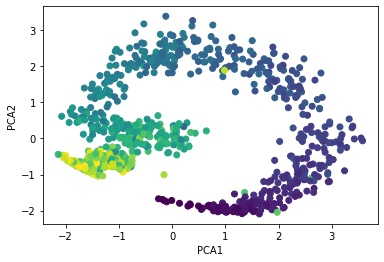

In [6]:
plt.scatter(adata.obsm["X_pca"][:, 0], adata.obsm["X_pca"][:, 1], c = adata.obs.dpt)
plt.xlabel("PCA1")
plt.ylabel("PCA2")

In [9]:
sc.tl.dpt(adata, n_branchings = 0)

/data/gpfs/projects/punim0638/stephenz/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


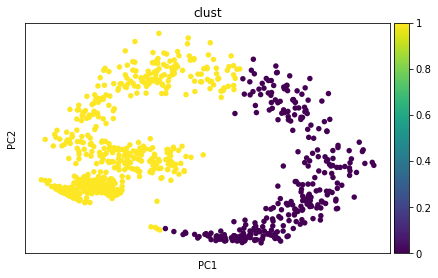

In [10]:
import sklearn as sk
from sklearn import cluster
adata.obs["clust"] = sk.cluster.KMeans(n_clusters = 2).fit_predict(adata.X)

sc.pl.scatter(adata, basis = "pca", color = "clust")

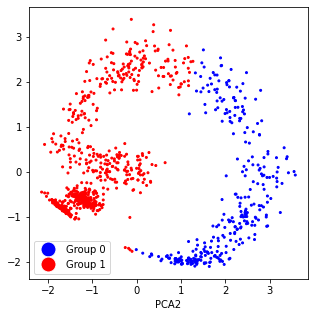

In [11]:
plt.figure(figsize = (PLT_CELL, PLT_CELL))
color_dict = {0 : "blue", 1 : "red"}
plt.scatter(adata.obsm["X_pca"][:, 0], adata.obsm["X_pca"][:, 1], c = [color_dict[x] for x in adata.obs.clust], s = 4)
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Group 0', markerfacecolor='b', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='Group 1', markerfacecolor='r', markersize=15), 
                   ]
plt.gca().legend(handles=legend_elements, loc='lower left')
plt.xlabel("PCA1")
plt.xlabel("PCA2")
plt.savefig(FIG_DIR + "sim_tsne.pdf")

In [12]:
np.save(DATA_PATH + "X_tsne2.npy", adata.obsm["X_tsne"])

In [13]:
np.save(DATA_PATH + "clusterid.npy", np.array([int(x) for x in adata.obs.clust]))